In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/drive/Othercomputers/Mon ordinateur portable/Data Science/movie_metadata.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [9]:
colonnes_à_deplacer = ["movie_title","genres","plot_keywords"]
cols = colonnes_à_deplacer + [col for col in df.columns if col not in colonnes_à_deplacer]
cols
df = df[cols]
df

,movie_title,genres,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Spectre,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,The Dark Knight Rises,Action|Thriller,deception|imprisonment|lawlessness|police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Comedy|Drama,fraud|postal worker|prison|theft|trial,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,The Following,Crime|Drama|Mystery|Thriller,cult|fbi|hideout|prison escape|serial killer,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,A Plague So Pleasant,Drama|Horror|Thriller,NaN,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Shanghai Calling,Comedy|Drama|Romance,NaN,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [14]:
df["genres"] = df["genres"].str.replace('|', ' ')
df["plot_keywords"] = df["plot_keywords"].str.replace('|', ' ')
df["plot_keywords"]

,plot_keywords
0,avatar future marine native paraplegic
1,goddess marriage ceremony marriage proposal pi...
2,bomb espionage sequel spy terrorist
3,deception imprisonment lawlessness police offi...
4,NaN
...,...
5038,fraud postal worker prison theft trial
5039,cult fbi hideout prison escape serial killer
5040,NaN
5041,NaN


In [23]:
df["about"] = df["genres"].astype(str) + " " + df["plot_keywords"].astype(str)
#or
#df["about"] = df["genres"].str.cat(df["plot_keywords"], sep=' ')
#or
#df["about"] = df[["genres","plot_keywords"]].apply(lambda x: ' '.join(x.values.astype(str)), axis=1)

df["about"]

,about
0,Action Adventure Fantasy Sci-Fi avatar future ...
1,Action Adventure Fantasy goddess marriage cere...
2,Action Adventure Thriller bomb espionage seque...
3,Action Thriller deception imprisonment lawless...
4,Documentary nan
...,...
5038,Comedy Drama fraud postal worker prison theft ...
5039,Crime Drama Mystery Thriller cult fbi hideout ...
5040,Drama Horror Thriller nan
5041,Comedy Drama Romance nan


In [17]:
test = df[["genres","plot_keywords","about"]].iloc[0]
print(test)

genres                             Action Adventure Fantasy Sci-Fi
plot_keywords               avatar future marine native paraplegic
about            Action Adventure Fantasy Sci-Fi avatar future ...
Name: 0, dtype: object


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [24]:
# now let's tf-idf this
tfidf = TfidfVectorizer(max_features=5000)
x = tfidf.fit_transform(df["about"])

In [31]:
movies = pd.Series(df.index, index=df['movie_title'])
movies.index = movies.index.str.strip()
movies.index = movies.index.str.lower()
movies

,0
movie_title,
avatar,0
pirates of the caribbean: at world's end,1
spectre,2
the dark knight rises,3
star wars: episode vii - the force awakens,4
...,...
signed sealed delivered,5038
the following,5039
a plague so pleasant,5040


In [33]:
indice = movies["avatar"]
indice

0

In [34]:
check = x[indice]
check

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [35]:
check.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [36]:
print(check)

  (0, 146)	0.15768796884847922
  (0, 171)	0.1721506945464198
  (0, 1691)	0.19802938240220444
  (0, 3660)	0.19792585488970732
  (0, 1719)	0.19792585488970732
  (0, 452)	0.5195113583740345
  (0, 1871)	0.35580424163259794
  (0, 2609)	0.44428405982224517
  (0, 2930)	0.48379405001494774


In [37]:
similarity = cosine_similarity(check,x) # angle between check(avatar) and all other movies one by one
similarity

array([[1.        , 0.07017544, 0.05938265, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
similarity[0][0]

1.0

In [39]:
import matplotlib.pyplot as plt

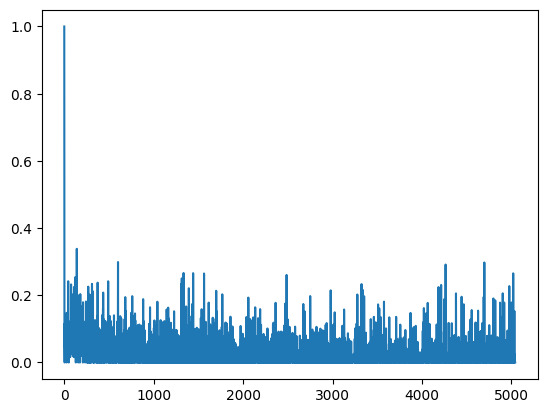

In [47]:
simi = similarity.flatten()#flatten permet de transformer du multidimensionnel en un tazbleau unidimensionnel

plt.plot(simi)

In [51]:
indices = (-simi).argsort()

In [46]:
df["movie_title"].iloc[601]

'Battle Los Angeles\xa0'

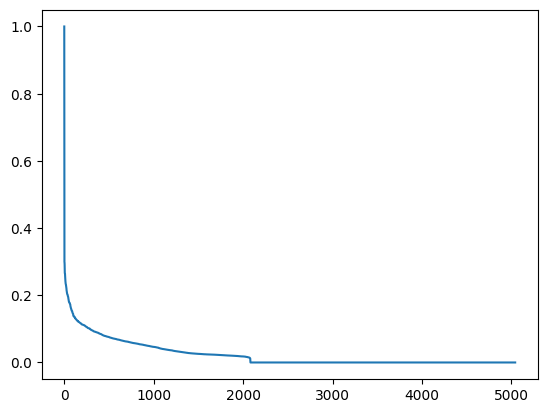

In [50]:
plt.plot(simi[(-simi).argsort()])

In [52]:
df["movie_title"].iloc[indices[1:11]]

,movie_title
140,The Last Airbender
601,Battle Los Angeles
4697,Naturally Native
4264,Smoke Signals
1334,Serenity
1441,In Time
5020,The Ridges
1563,Repo Men
2486,Aliens
124,The Matrix Revolutions


In [59]:
def ten_similar_movies(movie_title):
  movie_title = movie_title.lower()
  indice_movie = movies[movie_title]
  check = x[indice_movie]
  similarity = cosine_similarity(check,x).flatten()
  indices = (-similarity).argsort()
  return df["movie_title"].iloc[indices[1:11]]


In [60]:
ten_similar_movies("spectre")

,movie_title
291,True Lies
365,Die Hard with a Vengeance
862,Executive Decision
615,I Spy
1405,Spy Kids
286,Casino Royale
2944,Casino Royale
921,From Paris with Love
641,Body of Lies
3141,The Second Best Exotic Marigold Hotel


In [61]:
df.iloc[615]

,615
movie_title,I Spy
genres,Action Adventure Comedy Thriller
plot_keywords,boxer espionage spy stealth top secret
color,Color
director_name,Betty Thomas
num_critic_for_reviews,105.0
duration,97.0
director_facebook_likes,84.0
actor_3_facebook_likes,150.0
actor_2_name,Phill Lewis
